In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [2]:
import os

train_dir = "/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train"
train_paths = [os.path.join(train_dir, filename) for filename in os.listdir(train_dir)]

In [3]:
print("Total files found:", len(train_paths))
print(train_paths[:10])  # Print first 10 file paths for debugging

Total files found: 2
['/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train/labels', '/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train/images']


In [4]:
import os

# Define dataset root directory
dataset_path = "/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format"

# Define paths for train and validation sets
train_images_path = os.path.join(dataset_path, "train/images")
train_labels_path = os.path.join(dataset_path, "train/labels")

valid_images_path = os.path.join(dataset_path, "valid/images")
valid_labels_path = os.path.join(dataset_path, "valid/labels")

# Verify paths exist
print("Train Images:", os.listdir(train_images_path)[:5])  # Show first 5 images
print("Train Labels:", os.listdir(train_labels_path)[:5])  # Show first 5 label files
print("Validation Images:", os.listdir(valid_images_path)[:5])
print("Validation Labels:", os.listdir(valid_labels_path)[:5])


Train Images: ['-166.28119160162683,-164.90931076178953,39.24040892601955,40.61228976585686.png', '132.78883148290637,134.16071232274365,10.430911289436077,11.802792129273378.png', '-60.64636693415408,-59.274486094316764,-44.44432230405624,-43.07244146421894.png', '-179.99999999999991,-178.6281191601626,-49.93184566340548,-48.55996482356818.png', '-125.12476640650756,-123.75288556667027,31.00912388699569,32.381004726833.png']
Train Labels: ['25.78212597559634,27.154006815433643,-17.006705507310105,-15.634824667472792.txt', '66.93855117071558,68.31043201055287,18.662196328459927,20.03407716829723.txt', '97.11992964713636,98.49181048697369,-17.006705507310105,-15.634824667472792.txt', '-151.1905023634164,-149.8186215235791,7.687149609761457,9.05903044959876.txt', '-37.324392656919855,-34.58063097724523,69.42178740244033,70.79366824227765.txt']
Validation Images: ['147.8795207211168,149.25140156095404,3.571507090249538,4.94338793008684.png', '-52.41508189513022,-51.04320105529294,22.77783

In [5]:
import os
import cv2
import random
import matplotlib.pyplot as plt

def visualize_images_with_bboxes(image_dir, label_dir, num_images=5, img_size=(12, 12)):
    """
    Visualizes images with and without bounding boxes.

    Parameters:
    - image_dir (str): Path to the folder containing images.
    - label_dir (str): Path to the folder containing YOLO label files.
    - num_images (int): Number of images to visualize (default: 5).
    - img_size (tuple): Size of the displayed images (default: (12,12)).
    """
    # Get list of image files
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

    # Randomly select images
    selected_images = random.sample(image_files, min(num_images, len(image_files)))

    def draw_bboxes(image_path, label_path):
        """Draws bounding boxes on the image based on YOLO labels."""
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        h, w, _ = img.shape  # Get image dimensions

        bbox_count = 0  # Count bounding boxes

        try:
            with open(label_path, "r") as file:
                lines = file.readlines()

            for line in lines:
                values = line.strip().split()
                class_id = int(values[0])  # Get class ID
                x_center, y_center, box_w, box_h = map(float, values[1:])

                # Convert YOLO format to pixel values
                x1 = int((x_center - box_w / 2) * w)
                y1 = int((y_center - box_h / 2) * h)
                x2 = int((x_center + box_w / 2) * w)
                y2 = int((y_center + box_h / 2) * h)

                # Draw rectangle
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
                bbox_count += 1  # Increment count
        except:
            print(f"Warning: No label file found for {image_path}")

        return img, bbox_count

    # Display images
    plt.figure(figsize=img_size)
    for i, img_file in enumerate(selected_images):
        img_path = os.path.join(image_dir, img_file)
        label_path = os.path.join(label_dir, img_file.replace(".jpg", ".txt").replace(".png", ".txt"))

        # Load images
        img_original = cv2.imread(img_path)
        img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img_with_bboxes, bbox_count = draw_bboxes(img_path, label_path)

        # Show original image
        plt.subplot(num_images, 2, i * 2 + 1)
        plt.imshow(img_original)
        plt.axis("off")
        plt.title("Original")

        # Show image with bounding boxes
        plt.subplot(num_images, 2, i * 2 + 2)
        plt.imshow(img_with_bboxes)
        plt.axis("off")
        plt.title(f"With Bounding Boxes ({bbox_count} Craters)")

    plt.tight_layout()
    plt.show()



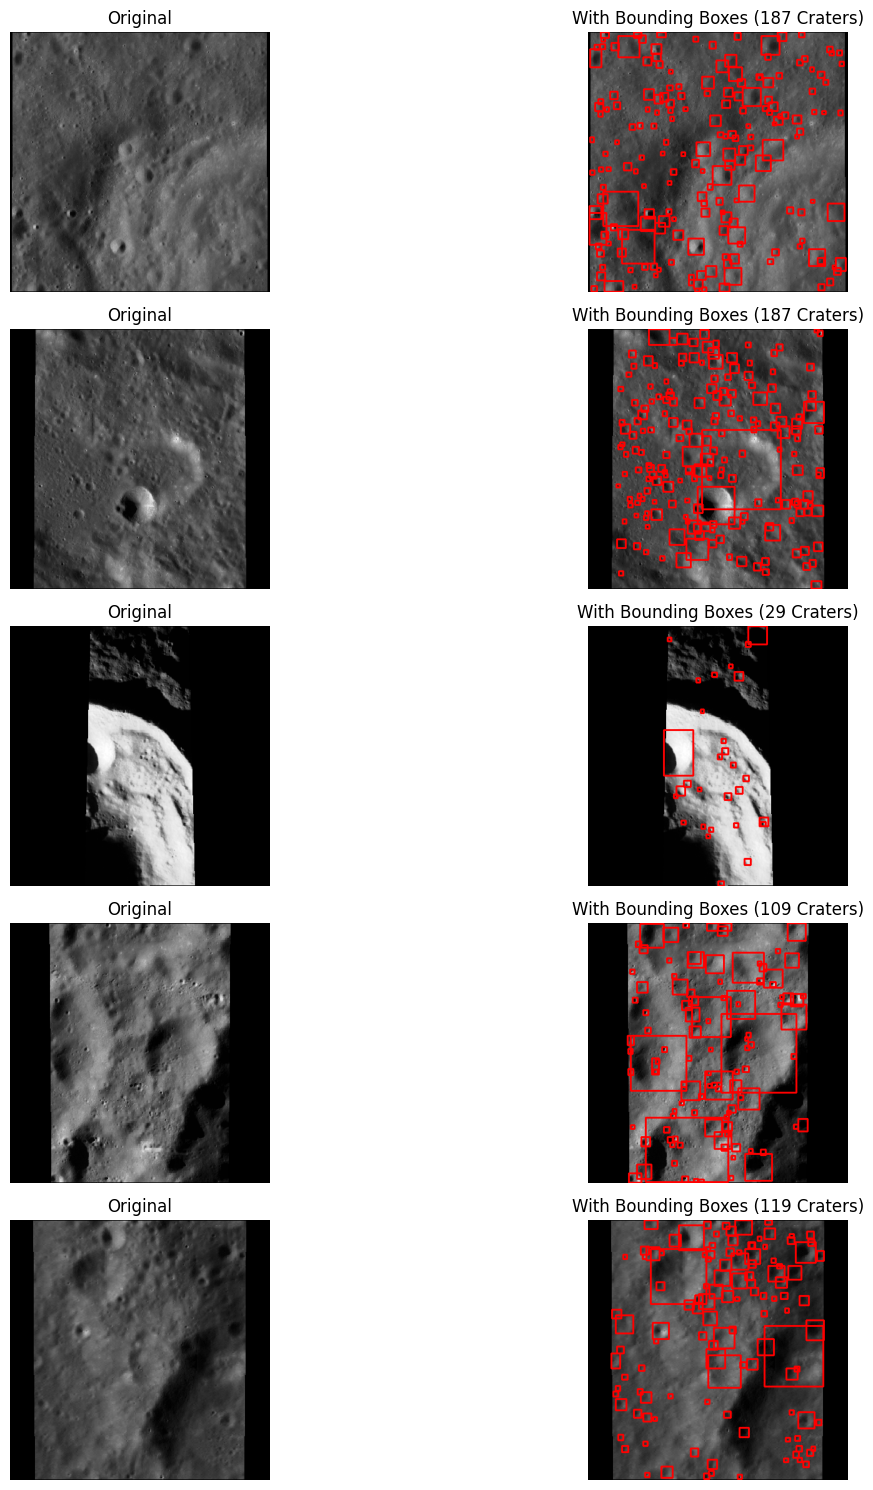

In [6]:
image_dir = "/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train/images"
label_dir = "/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train/labels"
visualize_images_with_bboxes(image_dir, label_dir, num_images=5, img_size=(15, 15))

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existin

In [8]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [9]:
model = YOLO('yolo11s.pt')

100%|██████████| 18.4M/18.4M [00:00<00:00, 249MB/s]


In [10]:
import torch

In [11]:
!nvidia-smi -L


GPU 0: Tesla T4 (UUID: GPU-a2023520-a2ef-95c2-b3e6-7beb3ef053ba)
GPU 1: Tesla T4 (UUID: GPU-59487efc-6a76-7ff7-b961-ddcbb51023f2)


In [12]:
import torch
print("GPUs available:", torch.cuda.device_count())  # Expect 2


GPUs available: 2


In [13]:
for name, param in model.model.named_parameters():
    if any(layer in name for layer in ["backbone", "stem"]):
        param.requires_grad = False


In [ ]:
from ultralytics import YOLO

# Load the pretrained YOLOv11 model
model = YOLO("yolo11s.pt")

# Train on GPUs 0 and 1 in parallel
results = model.train(
    data="/kaggle/input/data-yml/data.yaml",  # dataset config
    epochs=50,                               # training epochs
    imgsz=1056,                               # input size
    batch=8,                                  # batch size (divided across GPUs)
    lr0=1e-4,                                 # initial learning rate
    lrf=0.1,                                  # final LR multiplier
    device=[0, 1],                            # use both GPU 0 and GPU 1
    augment=True,                             # enable data augmentation
    optimizer="AdamW",                        # optimizer choice
    val=True,                                 # run validation each epoch
    save_period=10,                           # checkpoint every 10 epochs
    verbose=True                              # verbose logging
)


Ultralytics 8.3.123 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/kaggle/input/data-yml/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=1056, save=True, save_period=10, cache=False, device=[0, 1], workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sav

train: Scanning /kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train/labels... 8756 images, 121 backgrounds, 0 corrupt: 100%|██████████| 8756/8756 [00:12<00:00, 695.68it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


train: Scanning /kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train/labels... 265 images, 5 backgrounds, 0 corrupt:   3%|▎         | 265/8756 [00:00<00:16, 520.30it/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 146.8±51.9 MB/s, size: 108.4 KB)


val: Scanning /kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/valid/labels... 1545 images, 19 backgrounds, 0 corrupt: 100%|██████████| 1545/1545 [00:02<00:00, 554.38it/s]s]


WARNING ⚠️ val: Cache directory /kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/valid is not writeable, cache not saved.


train: Scanning /kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train/labels... 3673 images, 55 backgrounds, 0 corrupt:  42%|████▏     | 3673/8756 [00:05<00:06, 744.90it/s]

Plotting labels to runs/detect/train4/labels.jpg... 


train: Scanning /kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train/labels... 8756 images, 121 backgrounds, 0 corrupt: 100%|██████████| 8756/8756 [00:13<00:00, 628.93it/s]


optimizer: AdamW(lr=0.0001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 1056 train, 1056 val
Using 4 dataloader workers
Logging results to runs/detect/train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.21G      1.226      1.118     0.9793        333       1056: 100%|██████████| 1095/1095 [11:30<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [02:32<00:00,  1.27it/s]


                   all       1545     171392      0.724      0.674      0.759      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.13G     0.9535     0.8186     0.8949        164       1056: 100%|██████████| 1095/1095 [11:18<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [02:25<00:00,  1.33it/s]


                   all       1545     171392      0.807      0.758      0.861      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.13G     0.8539     0.7018     0.8686         86       1056: 100%|██████████| 1095/1095 [11:14<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [02:25<00:00,  1.33it/s]


                   all       1545     171392      0.848      0.817      0.908      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.13G     0.7951     0.6585      0.856        230       1056: 100%|██████████| 1095/1095 [11:15<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [02:25<00:00,  1.33it/s]


                   all       1545     171392      0.848      0.823      0.912      0.763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.13G     0.7719     0.6304     0.8498        694       1056:  99%|█████████▉| 1086/1095 [11:10<00:05,  1.61it/s]

In [21]:
model.val()

Ultralytics 8.3.123 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.7 ms, read: 211.4±24.0 MB/s, size: 127.7 KB)


val: Scanning /kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/valid/labels... 1545 images, 19 backgrounds, 0 corrupt: 100%|██████████| 1545/1545 [00:02<00:00, 520.94it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/valid is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 194/194 [02:24<00:00,  1.35it/s]


                   all       1545     171392      0.909      0.887      0.958      0.863


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.7ms preprocess, 63.7ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train42


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x784f95668ed0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/runs/detect/train4/weights/best.pt'


0: 608x1056 300 craters, 178.8ms
Speed: 6.0ms preprocess, 178.8ms inference, 2.4ms postprocess per image at shape (1, 3, 608, 1056)
Number of craters detected: 300


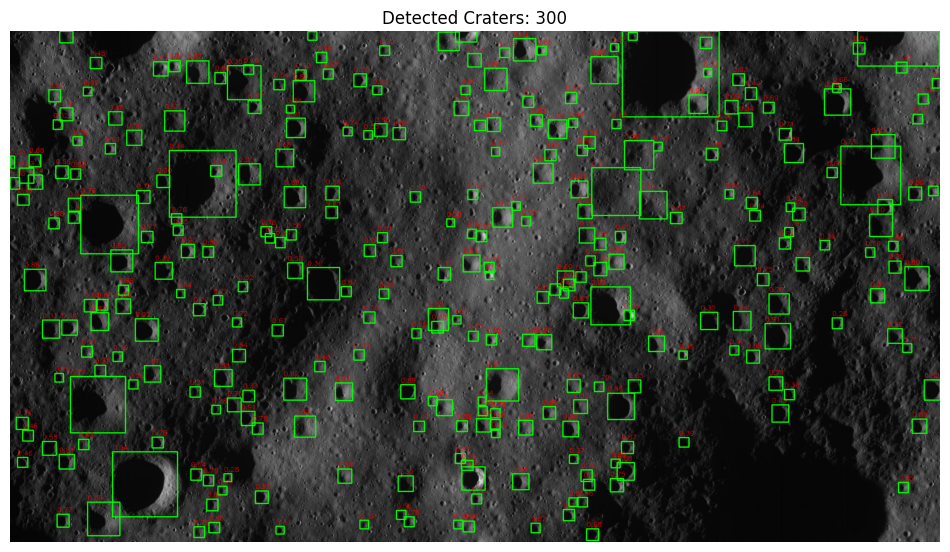

True

In [3]:
# from ultralytics import YOLO
# import cv2
# from matplotlib import pyplot as plt

# # Load your trained YOLO model
# model = YOLO('/kaggle/working/runs/detect/train4/weights/best.pt')  # Replace with your model path

# # Load the image
# image_path = '/kaggle/input/testnew12/19.jpg'  # Replace with your image path
# img = cv2.imread(image_path)

# # Run inference with lower confidence threshold, lower IoU threshold, and test-time augmentation
# results = model.predict(img, conf=0.2, iou=0.3, augment=True)

# # Draw bounding boxes and show confidence scores
# for box, score in zip(results[0].boxes.xyxy, results[0].boxes.conf):
#     x1, y1, x2, y2 = map(int, box)
#     cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
#     cv2.putText(img, f'{score:.2f}', (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# # Number of craters
# num_craters = len(results[0].boxes)
# print(f"Number of craters detected: {num_craters}")

# # Convert BGR to RGB for display
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # Display in Kaggle
# plt.figure(figsize=(12, 8))
# plt.imshow(img_rgb)
# plt.axis('off')
# plt.title(f'Detected Craters: {num_craters}')
# plt.show()

# # Save the image (optional)
# cv2.imwrite('craters_detected.jpg', img)
















In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [ ]:
import os
import shutil
from pathlib import Path
from sklearn.model_selection import KFold
from ultralytics import YOLO

# --- Configuration ---
image_dir   = Path("/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train/images")
label_dir   = Path("/kaggle/input/lu3m6tgt/LU3M6TGT_yolo_format/train/labels")
model_weights = "yolo11s.pt"
k_folds     = 5
random_seed = 42

# --- Validate dataset presence ---
image_files = sorted(image_dir.glob("*.png"))
if not image_files:
    raise ValueError(f"No images found in {image_dir}")

# --- Prepare KFold splitter ---
kf = KFold(n_splits=k_folds, shuffle=True, random_state=random_seed)

# --- Cross-validation loop ---
for fold, (train_idx, val_idx) in enumerate(kf.split(image_files), start=1):
    print(f"\n=== Fold {fold}/{k_folds} ===")

    # --- Setup directory structure for this fold ---
    base_path = Path(f"/kaggle/working/fold_{fold}")
    dirs = {
        "train_img": base_path / "images" / "train",
        "val_img":   base_path / "images" / "val",
        "train_lbl": base_path / "labels" / "train",
        "val_lbl":   base_path / "labels" / "val",
    }
    for d in dirs.values():
        d.mkdir(parents=True, exist_ok=True)

    # --- Copy train and val sets ---
    for idx_list, img_type in [(train_idx, "train"), (val_idx, "val")]:
        for i in idx_list:
            img = image_files[i]
            lbl = label_dir / f"{img.stem}.txt"
            if not img.exists() or not lbl.exists():
                print(f"Missing pair: {img} or {lbl}, skipping.")
                continue
            shutil.copy(img, dirs[f"{img_type}_img"] / img.name)
            shutil.copy(lbl, dirs[f"{img_type}_lbl"] / lbl.name)

    # --- Write dynamic data.yaml ---
    data_yaml = base_path / "data.yaml"
    data_yaml.write_text(f"""
path: {base_path}
train: images/train
val:   images/val
nc:    1
names: ['crater']
""")

    # --- Train model ---
    model = YOLO(model_weights)
    try:
        model.train(
            data=str(data_yaml),
            epochs=20,
            imgsz=640,
            batch=8,
            lr0=1e-4,
            lrf=0.1,
            device=[0, 1],
            augment=True,
            optimizer="AdamW",
            val=True,
            save_period=10,
            verbose=True,
            project="kfold_yolo11",
            name=f"fold_{fold}",
            exist_ok=True
        )
    except Exception as e:
        print(f"❌ Fold {fold} failed: {e}")
        continue


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

=== Fold 1/5 ===


100%|██████████| 18.4M/18.4M [00:00<00:00, 132MB/s]


Ultralytics 8.3.130 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/fold_1/data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=fold_1, nbs=64, nms=False, opset=None, optimize=False, optimizer=Ada

100%|██████████| 755k/755k [00:00<00:00, 16.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 70.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2177.6±819.6 MB/s, size: 115.8 KB)


train: Scanning /kaggle/working/fold_1/labels/train... 7004 images, 97 backgrounds, 0 corrupt: 100%|██████████| 7004/7004 [00:07<00:00, 970.59it/s] 


train: New cache created: /kaggle/working/fold_1/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1238.2±843.8 MB/s, size: 97.4 KB)


val: Scanning /kaggle/working/fold_1/labels/val... 1752 images, 24 backgrounds, 0 corrupt: 100%|██████████| 1752/1752 [00:02<00:00, 803.72it/s]


val: New cache created: /kaggle/working/fold_1/labels/val.cache
Plotting labels to kfold_yolo11/fold_1/labels.jpg... 
optimizer: AdamW(lr=0.0001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to kfold_yolo11/fold_1
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.37G      1.547       1.18     0.9873        254        640: 100%|██████████| 876/876 [02:30<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:27<00:00,  7.93it/s]


                   all       1752     189944      0.696      0.615      0.704       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.83G      1.235     0.9624     0.9127        115        640: 100%|██████████| 876/876 [02:21<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


                   all       1752     189944      0.681      0.641      0.718      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.83G      1.139     0.8928      0.892        532        640: 100%|██████████| 876/876 [02:19<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.43it/s]


                   all       1752     189944      0.759      0.696      0.792      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.83G      1.062     0.7951     0.8764        165        640: 100%|██████████| 876/876 [02:18<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


                   all       1752     189944      0.795      0.766      0.854      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.83G     0.9946     0.7412     0.8646        361        640: 100%|██████████| 876/876 [02:19<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.46it/s]


                   all       1752     189944      0.837      0.794      0.888      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.83G     0.9639     0.7106     0.8571        206        640: 100%|██████████| 876/876 [02:19<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.52it/s]


                   all       1752     189944      0.784      0.776      0.854      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.28G     0.9307     0.6897     0.8531        231        640: 100%|██████████| 876/876 [02:19<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.61it/s]


                   all       1752     189944       0.84      0.801      0.895       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.28G     0.9041     0.6718     0.8497        237        640: 100%|██████████| 876/876 [02:18<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


                   all       1752     189944       0.84       0.81      0.899      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.28G     0.8913     0.6618     0.8473        331        640: 100%|██████████| 876/876 [02:19<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


                   all       1752     189944      0.856      0.822      0.911      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.28G     0.8717     0.6458     0.8456        321        640: 100%|██████████| 876/876 [02:19<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]


                   all       1752     189944      0.841      0.818      0.902      0.727
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.28G     0.8285     0.6338     0.8364        224        640: 100%|██████████| 876/876 [02:13<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


                   all       1752     189944      0.852      0.821      0.909      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.28G     0.8074     0.6138     0.8331        282        640: 100%|██████████| 876/876 [02:12<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


                   all       1752     189944      0.857      0.825      0.913      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.28G     0.8013     0.6066     0.8315        166        640: 100%|██████████| 876/876 [02:13<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


                   all       1752     189944      0.855      0.828      0.913      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.28G     0.7884     0.5978     0.8306         95        640: 100%|██████████| 876/876 [02:13<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


                   all       1752     189944      0.856      0.828      0.914      0.745

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.28G     0.7842     0.5907     0.8284        324        640: 100%|██████████| 876/876 [02:13<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


                   all       1752     189944      0.846       0.82      0.906      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.28G     0.7784     0.5868     0.8278        329        640: 100%|██████████| 876/876 [02:12<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.62it/s]


                   all       1752     189944       0.86      0.833      0.918      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.28G     0.7717     0.5795     0.8274        565        640: 100%|██████████| 876/876 [02:13<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


                   all       1752     189944      0.864      0.834       0.92      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.28G     0.7678     0.5782     0.8265        146        640: 100%|██████████| 876/876 [02:13<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.68it/s]


                   all       1752     189944      0.868       0.84      0.924      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.28G     0.7613     0.5722     0.8256        204        640: 100%|██████████| 876/876 [02:13<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


                   all       1752     189944      0.869       0.84      0.924      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.28G     0.7537     0.5659     0.8236         82        640: 100%|██████████| 876/876 [02:13<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


                   all       1752     189944      0.869      0.838      0.924      0.759

20 epochs completed in 0.909 hours.
Optimizer stripped from kfold_yolo11/fold_1/weights/last.pt, 19.2MB
Optimizer stripped from kfold_yolo11/fold_1/weights/best.pt, 19.2MB

Validating kfold_yolo11/fold_1/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [01:03<00:00,  3.46it/s]


                   all       1752     189944      0.863      0.832      0.918      0.721


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 12.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to kfold_yolo11/fold_1

=== Fold 2/5 ===
Ultralytics 8.3.130 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/fold_2/data.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, 

train: Scanning /kaggle/working/fold_2/labels/train... 7005 images, 100 backgrounds, 0 corrupt: 100%|██████████| 7005/7005 [00:07<00:00, 895.48it/s]


train: New cache created: /kaggle/working/fold_2/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1105.3±360.7 MB/s, size: 98.0 KB)


val: Scanning /kaggle/working/fold_2/labels/val... 1751 images, 21 backgrounds, 0 corrupt: 100%|██████████| 1751/1751 [00:02<00:00, 797.32it/s]


val: New cache created: /kaggle/working/fold_2/labels/val.cache
Plotting labels to kfold_yolo11/fold_2/labels.jpg... 
optimizer: AdamW(lr=0.0001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to kfold_yolo11/fold_2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.05G      1.553       1.19     0.9898        500        640: 100%|██████████| 876/876 [02:32<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]


                   all       1751     191424      0.678      0.567      0.661      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       4.8G      1.231      0.969     0.9123        357        640: 100%|██████████| 876/876 [02:24<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:26<00:00,  8.21it/s]


                   all       1751     191424      0.739      0.683      0.771      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       4.8G      1.126     0.8658     0.8907        600        640: 100%|██████████| 876/876 [02:22<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]


                   all       1751     191424      0.798      0.721       0.83       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       4.8G      1.035     0.7718     0.8701        265        640: 100%|██████████| 876/876 [02:21<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


                   all       1751     191424      0.818      0.774       0.87      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       4.8G     0.9822     0.7337     0.8615        947        640: 100%|██████████| 876/876 [02:21<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 219/219 [00:25<00:00,  8.47it/s]


                   all       1751     191424       0.84      0.798      0.892      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       4.8G      0.955     0.7019     0.8556       1151        640:  92%|█████████▏| 803/876 [02:09<00:11,  6.19it/s]

In [3]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
model = YOLO('/kaggle/input/kfoldmodel/tensorflow2/default/1/best (1).pt')

In [6]:
model.val()

Ultralytics 8.3.131 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)


FileNotFoundError: '/kaggle/working/fold_5/data.yaml' does not exist

In [ ]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import torch
from torchvision.ops import nms
import numpy as np

# Load model (trained at 640x640)
model = YOLO('/kaggle/input/kfoldmodel/tensorflow2/default/1/best (1).pt')

# Load image
image_path = '/kaggle/input/test122/neww.jpg'
original_img = cv2.imread(image_path)
original_h, original_w = original_img.shape[:2]

# Parameters
tile_size = 640
stride = 512  # overlap
conf_thres = 0.1
iou_nms = 0.3

# Containers for predictions
all_boxes, all_scores, all_classes = [], [], []

# Slide over the image
for y in range(0, original_h, stride):
    for x in range(0, original_w, stride):
        # Crop tile
        tile = original_img[y:y + tile_size, x:x + tile_size]
        tile_h, tile_w = tile.shape[:2]
        if tile_h < 64 or tile_w < 64:
            continue  # skip very small edges

        # Predict
        results = model.predict(tile, imgsz=640, conf=conf_thres, iou=0.4, augment=False)
        boxes = results[0].boxes

        if boxes is not None and boxes.xyxy.numel() > 0:
            for box, score, cls in zip(boxes.xyxy, boxes.conf, boxes.cls):
                x1, y1, x2, y2 = box
                # Shift box back to original image coordinates
                all_boxes.append([x1 + x, y1 + y, x2 + x, y2 + y])
                all_scores.append(score)
                all_classes.append(cls)

# Convert to tensors
if len(all_boxes) > 0:
    all_boxes = torch.tensor(all_boxes)
    all_scores = torch.tensor(all_scores)
    all_classes = torch.tensor(all_classes)

    # Apply NMS
    indices = nms(all_boxes, all_scores, iou_nms)

    final_boxes = all_boxes[indices]
    final_scores = all_scores[indices]
    final_classes = all_classes[indices]

    # Draw boxes
    for box, score, cls in zip(final_boxes, final_scores, final_classes):
        x1, y1, x2, y2 = map(int, box)
        label = f'{model.names[int(cls)]} {score:.2f}'
        cv2.rectangle(original_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(original_img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

    # Show image
    print(f"Number of craters detected after sliding window NMS: {len(indices)}")
else:
    print("No detections.")

# Display
img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f'Detected Craters: {len(indices)}' if len(all_boxes) > 0 else "No craters detected")
plt.show()

# Save
cv2.imwrite('craters_detected_sliding_window.jpg', original_img)
